In [66]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [67]:

# Define the matrix
A = np.array([[1, 2], 
              [3, 4]])



In [68]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)



In [69]:

# Output the results
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [-0.37228132  5.37228132]
Eigenvectors:
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


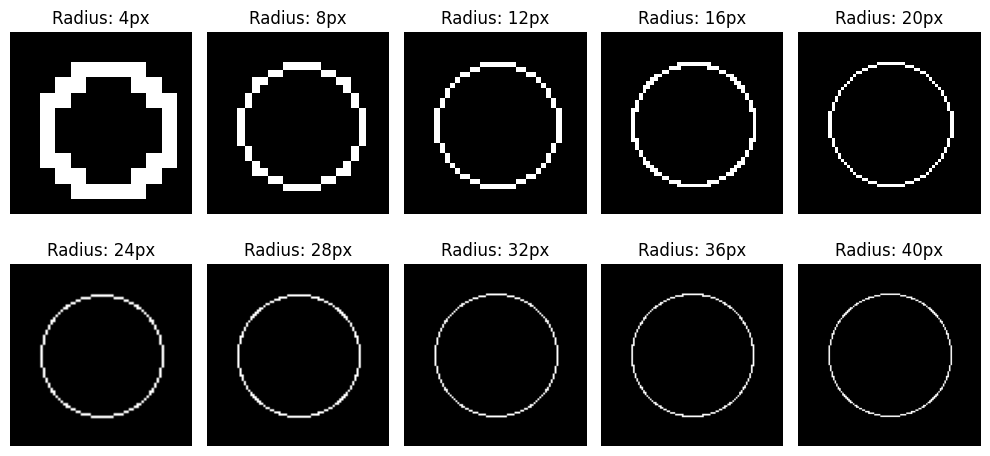

In [70]:
# Function to create an image with a hollow circle of a given radius
def create_hollow_circle_image_with_margin(radius):
    # Image size = Diameter + radius (to leave r/2 margin on each side)
    size = 3 * radius
    image = np.zeros((size, size))

    center = size // 2

    # Create a hollow circle
    for y in range(size):
        for x in range(size):
            dist = np.sqrt((x - center) ** 2 + (y - center) ** 2)
            if radius - 0.5 < dist < radius + 0.5:
                image[y, x] = 1

    return image

# Radii ranging from 4 to 40
radii = np.linspace(4, 40, 10).astype(int)

# Create and display images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, radius in zip(axes.flatten(), radii):
    image = create_hollow_circle_image_with_margin(radius)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Radius: {radius}px")
    ax.axis('off') # Hide axes

plt.tight_layout()
plt.show()


12
9


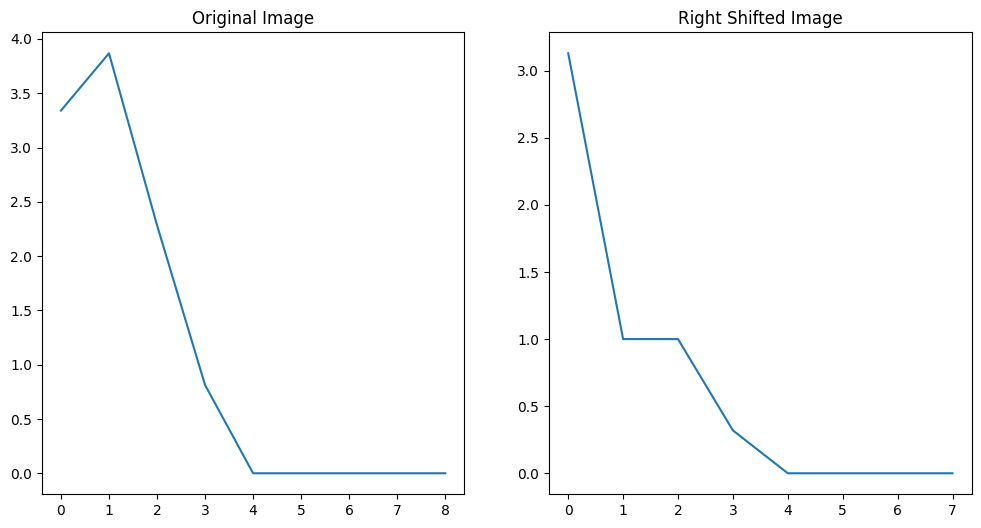

Pairs with angle >= 0.95:
Pair (i=0, j=1) has cosine similarity: 0.9610
Pair (i=0, j=2) has cosine similarity: 0.9610
Pair (i=1, j=0) has cosine similarity: 0.9952


Text(0.5, 1.0, 'Right shift Image')

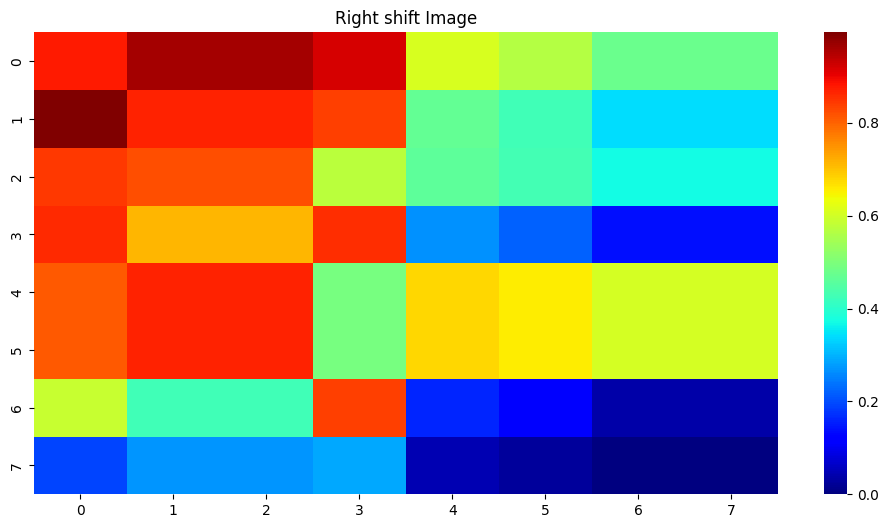

In [72]:
image = create_hollow_circle_image_with_margin(4)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T
print(eVec.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])

angle = np.zeros((min_dim, min_dim))


# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')


24
17


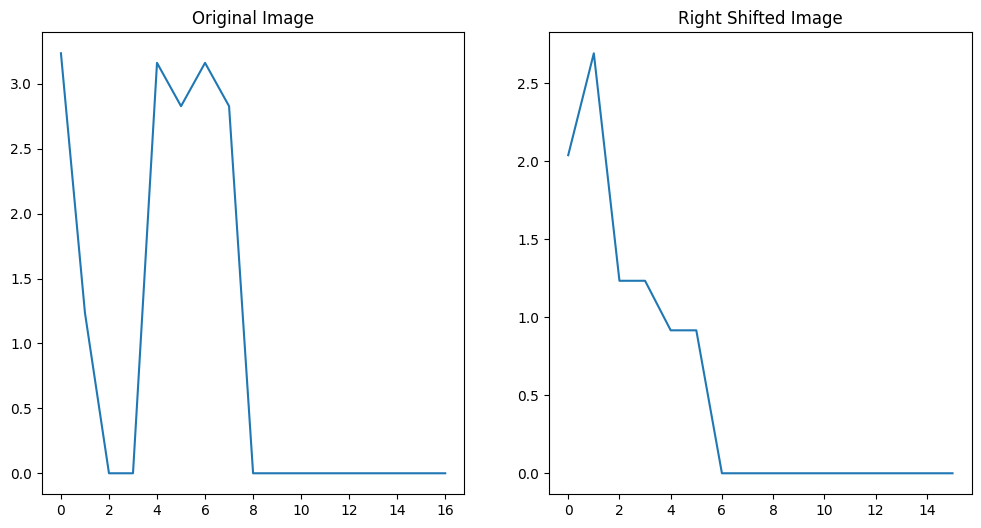

Pairs with angle >= 0.95:


Text(0.5, 1.0, 'Right shift Image')

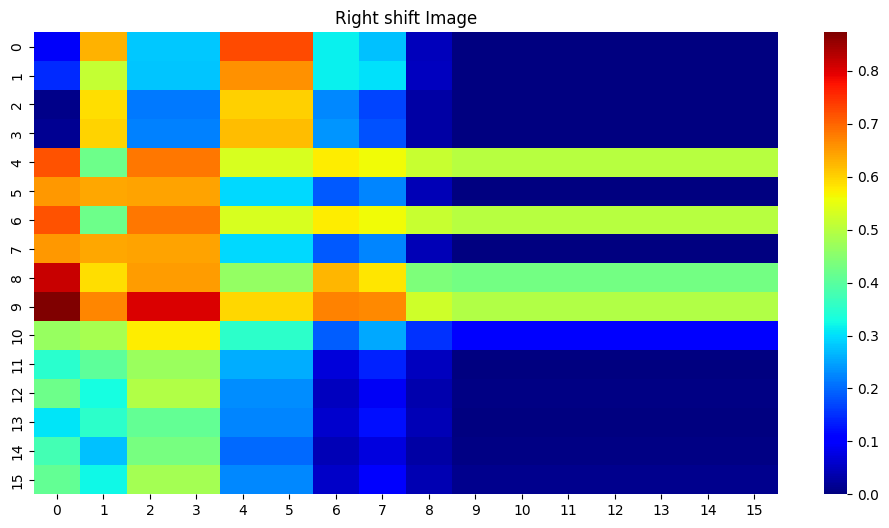

In [73]:
image = create_hollow_circle_image_with_margin(8)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T
print(eVec.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])

angle = np.zeros((min_dim, min_dim))


# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')


36
25


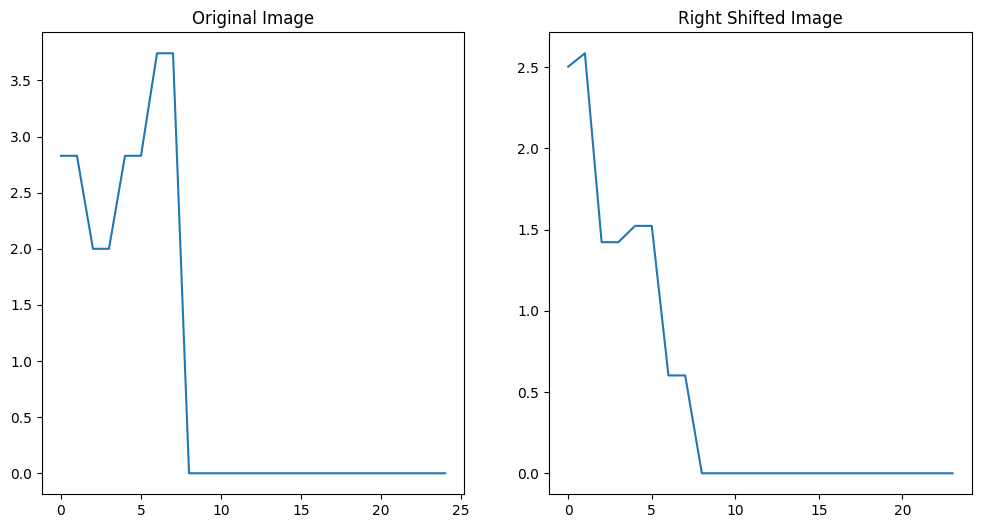

Pairs with angle >= 0.95:


Text(0.5, 1.0, 'Right shift Image')

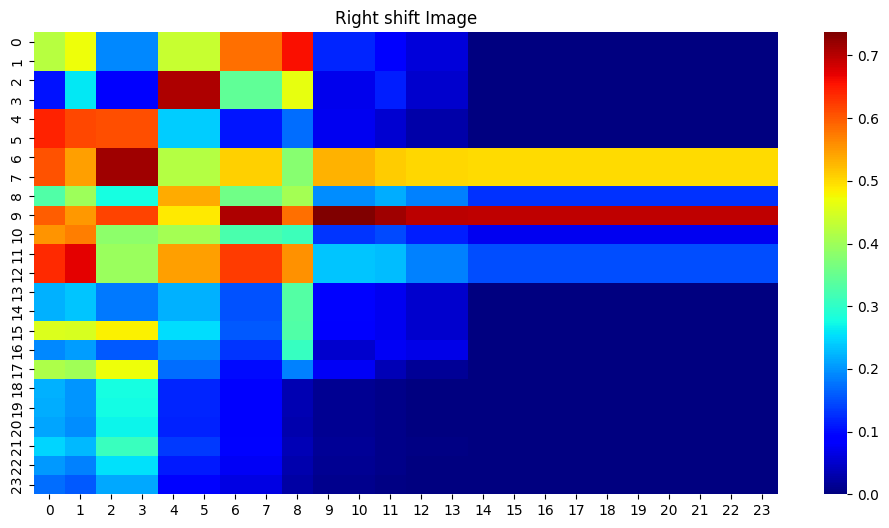

In [74]:
image = create_hollow_circle_image_with_margin(12)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T
print(eVec.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])

angle = np.zeros((min_dim, min_dim))


# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')


48
33


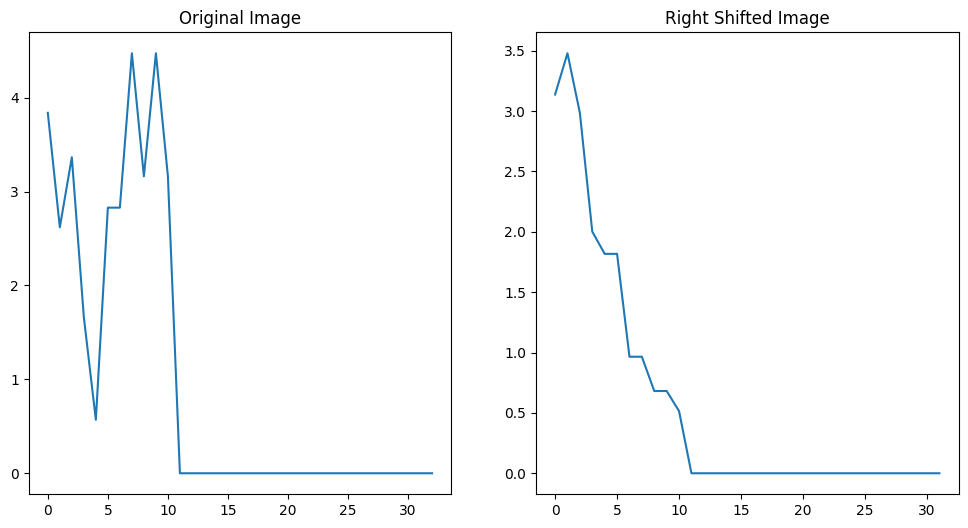

Pairs with angle >= 0.95:


Text(0.5, 1.0, 'Right shift Image')

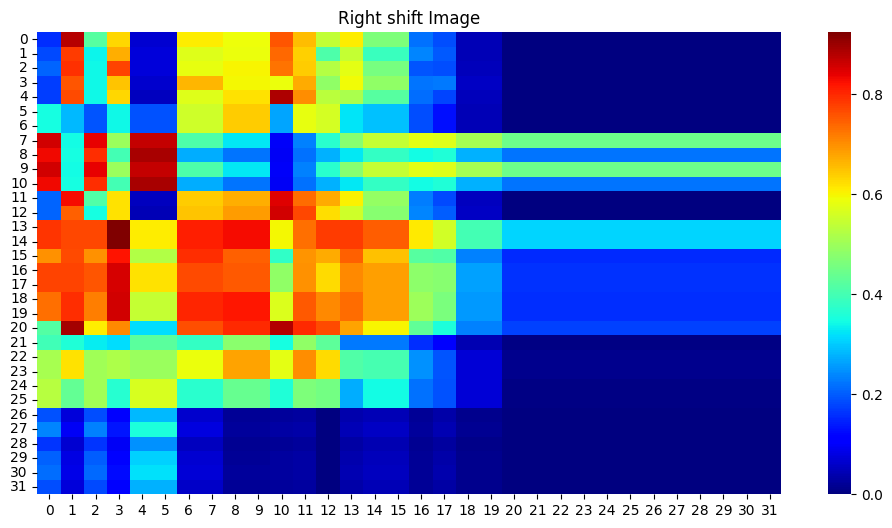

In [75]:
image = create_hollow_circle_image_with_margin(16)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T
print(eVec.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])

angle = np.zeros((min_dim, min_dim))


# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')


60
41


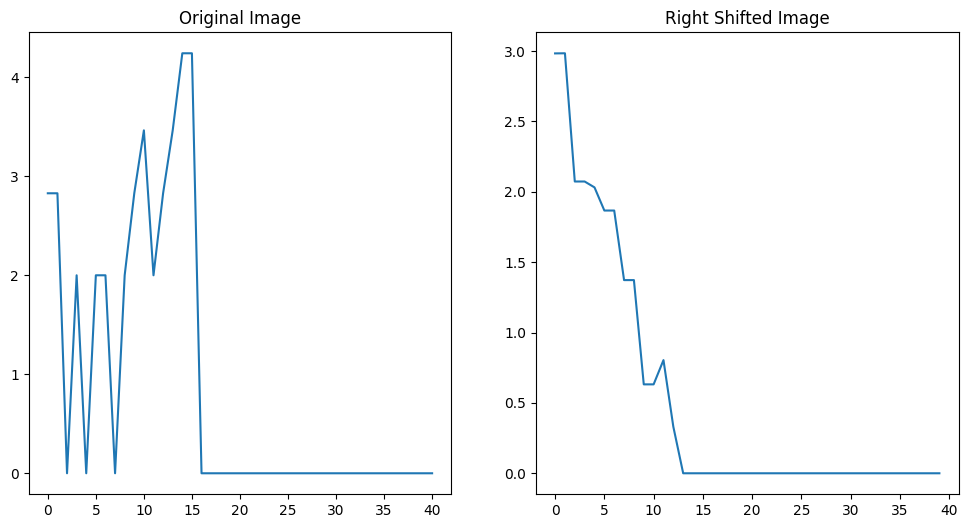

Pairs with angle >= 0.95:


Text(0.5, 1.0, 'Right shift Image')

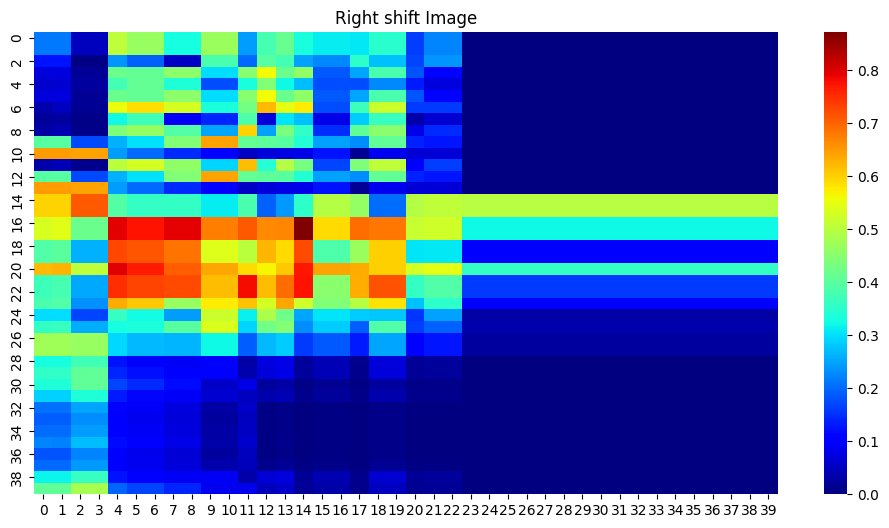

In [76]:
image = create_hollow_circle_image_with_margin(20)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T
print(eVec.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])

angle = np.zeros((min_dim, min_dim))


# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')


72
49


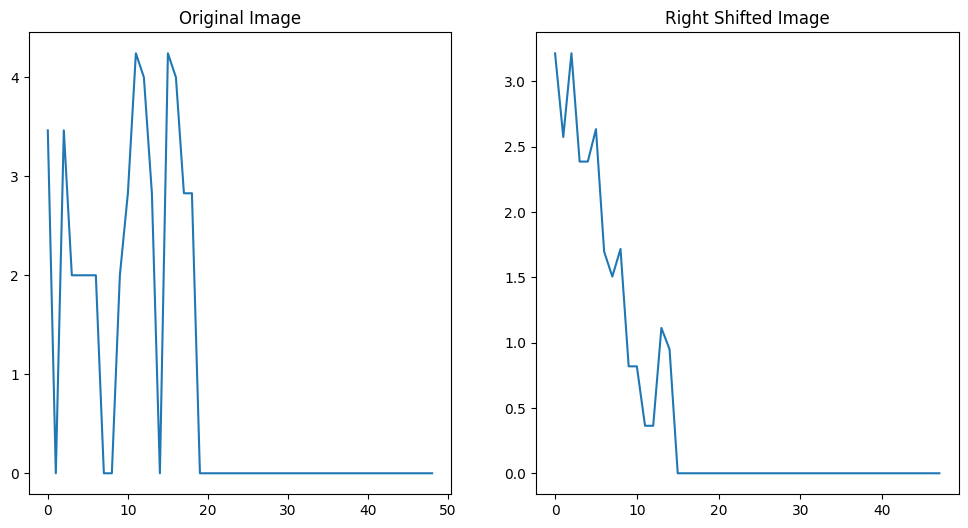

Pairs with angle >= 0.95:


Text(0.5, 1.0, 'Right shift Image')

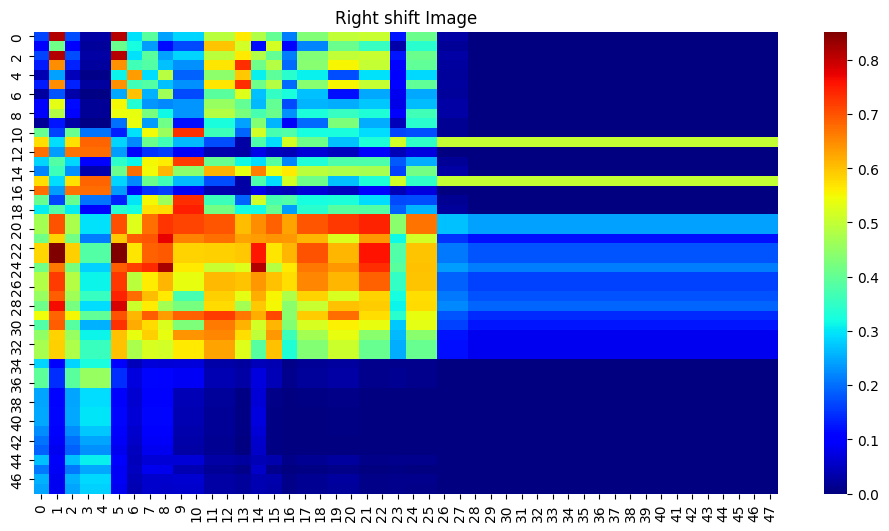

In [77]:
image = create_hollow_circle_image_with_margin(24)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T
print(eVec.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])

angle = np.zeros((min_dim, min_dim))


# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')


84
57


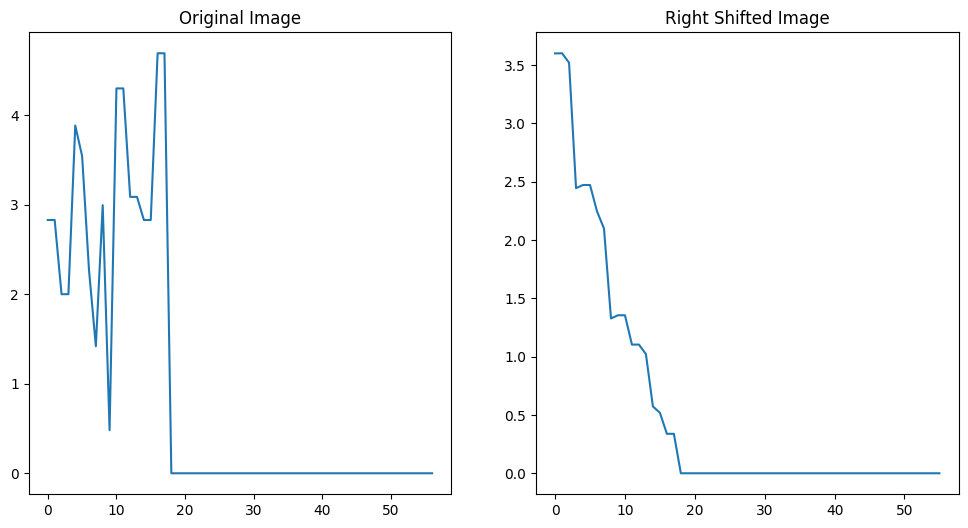

Pairs with angle >= 0.95:
Pair (i=4, j=2) has cosine similarity: 0.9798


Text(0.5, 1.0, 'Right shift Image')

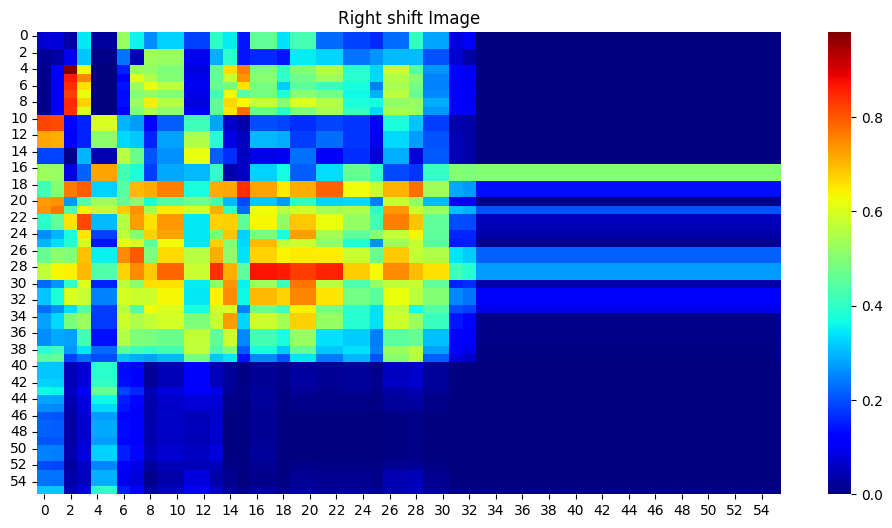

In [78]:
image = create_hollow_circle_image_with_margin(28)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T
print(eVec.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])

angle = np.zeros((min_dim, min_dim))


# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')


96
65


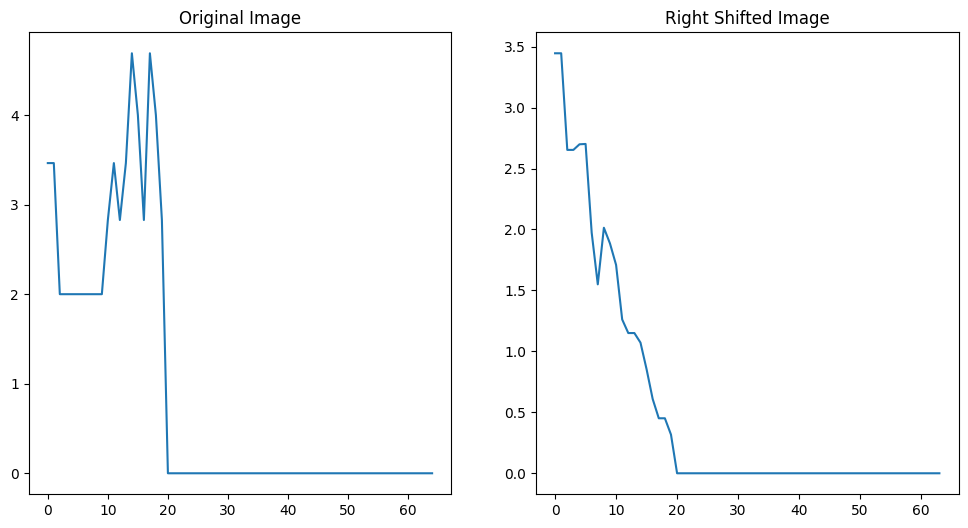

Pairs with angle >= 0.95:


Text(0.5, 1.0, 'Right shift Image')

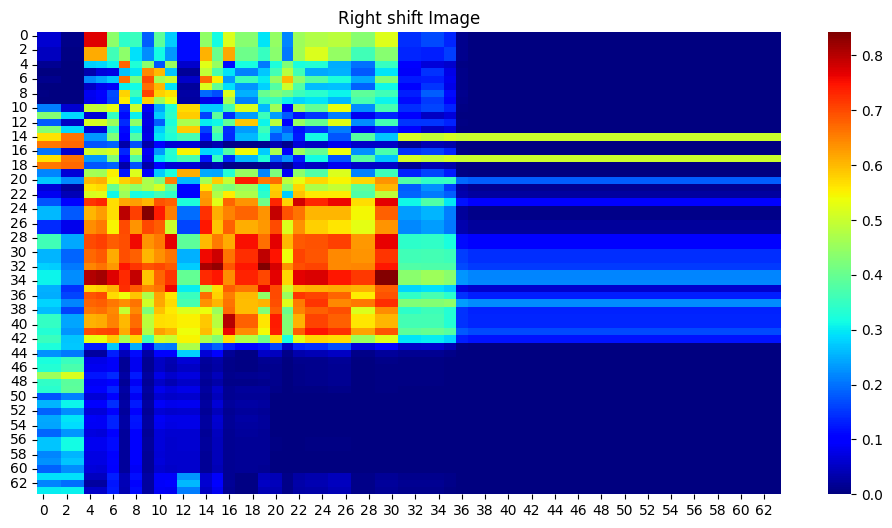

In [79]:
image = create_hollow_circle_image_with_margin(32)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T
print(eVec.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])

angle = np.zeros((min_dim, min_dim))


# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')


108
73


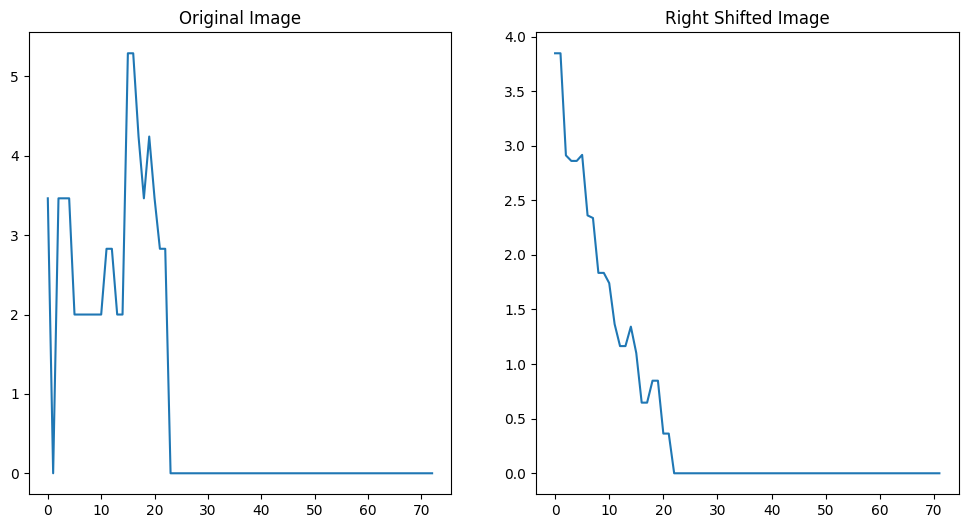

Pairs with angle >= 0.95:


Text(0.5, 1.0, 'Right shift Image')

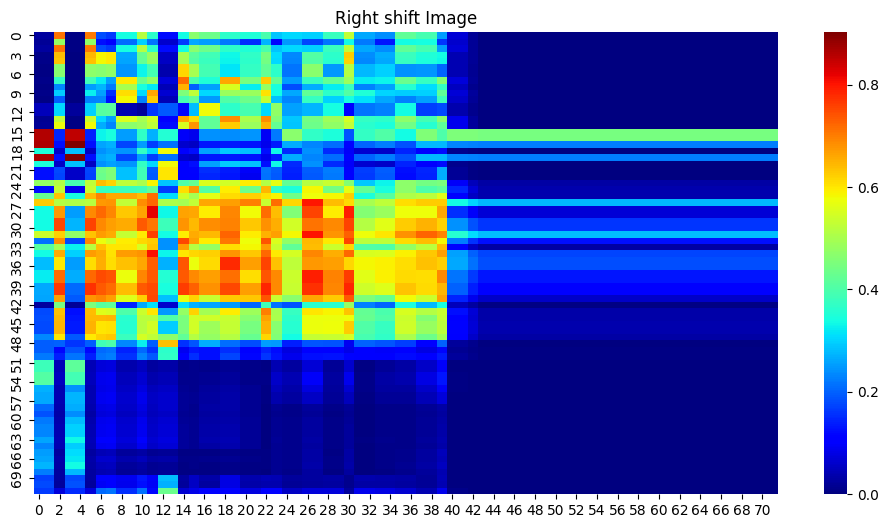

In [80]:
image = create_hollow_circle_image_with_margin(36)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T
print(eVec.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])

angle = np.zeros((min_dim, min_dim))


# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')


120
81


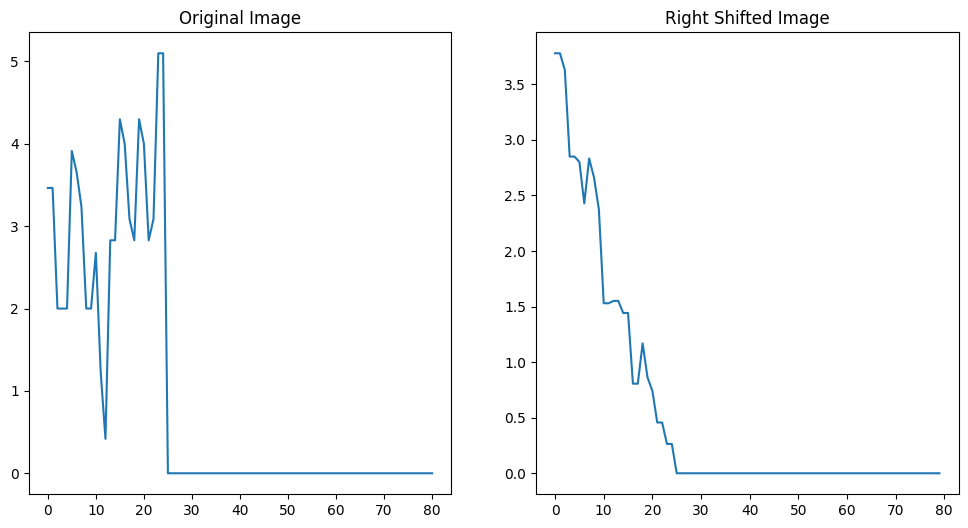

Pairs with angle >= 0.95:
Pair (i=5, j=2) has cosine similarity: 0.9926


Text(0.5, 1.0, 'Right shift Image')

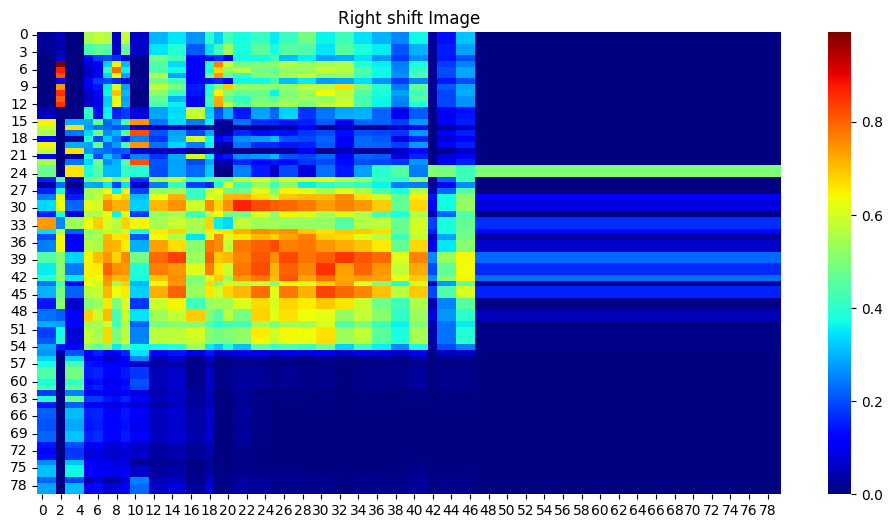

In [81]:
image = create_hollow_circle_image_with_margin(40)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T
print(eVec.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])

angle = np.zeros((min_dim, min_dim))


# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')


300
201


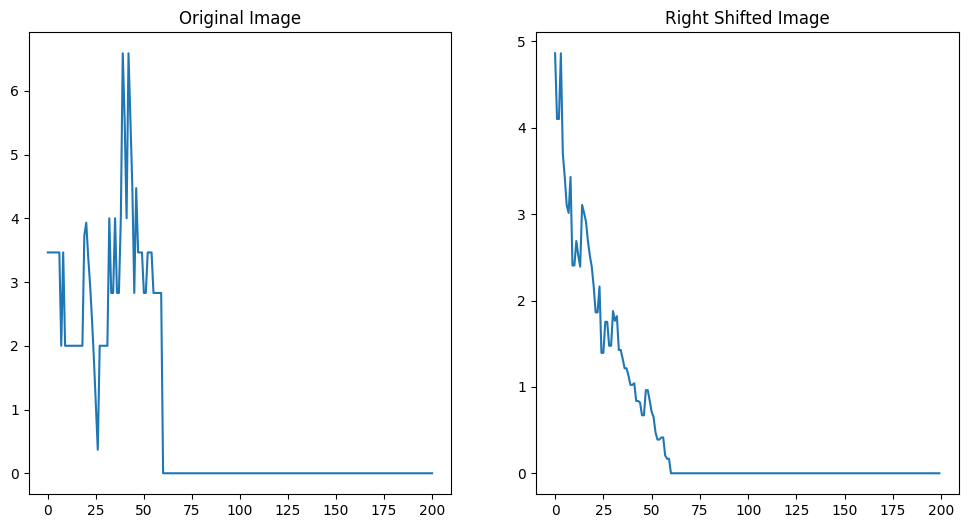

Pairs with angle >= 0.95:
Pair (i=19, j=16) has cosine similarity: 0.9726
Pair (i=20, j=4) has cosine similarity: 0.9958


Text(0.5, 1.0, 'Right shift Image')

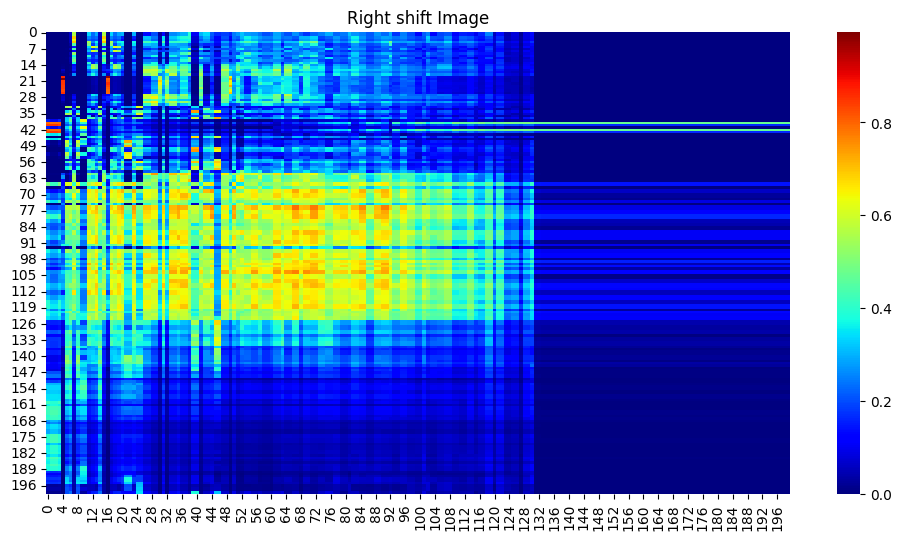

In [82]:
image = create_hollow_circle_image_with_margin(100)
print(len(image))
zero=image
zero_shifted = np.zeros_like(zero)
for i in range(len(zero)):
    zero_shifted[i][0] = 0  # First column is set to 0
    for j in range(1, len(zero[0])):  # Shift the rest of the columns
        zero_shifted[i][j] = zero[i][j - 1]

eVal, eVec = np.linalg.eig(zero)
non_zero_indices = np.where(np.abs(eVal) > 0)[0]
eVal = eVal[non_zero_indices]
eVec = eVec[:, non_zero_indices]
eVec = eVec.T

eVal_shifted, eVec_shifted = np.linalg.eig(zero_shifted)
non_zero_indices = np.where(np.abs(eVal_shifted) > 0)[0]
eVal_shifted = eVal_shifted[non_zero_indices]
eVec_shifted = eVec_shifted[:, non_zero_indices]
eVec_shifted = eVec_shifted.T
print(eVec.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.abs(eVal))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.plot(np.abs(eVal_shifted))
plt.title('Right Shifted Image')
plt.show()

min_dim = min(eVec.shape[0], eVec_shifted.shape[0])

angle = np.zeros((min_dim, min_dim))


# Calculate angles and populate the angle matrix
for i in range(min_dim):
    for j in range(min_dim):
        # Compute cosine similarity between row i of eVec and row j of eVec_shifted
        a = np.abs(eVec[i])
        b = np.abs(eVec_shifted[j])
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cosine_similarity = dot_product / (norm_a * norm_b)
        
        # Store the result in the angle matrix
        angle[i, j] = cosine_similarity

#print(angle)
print("Pairs with angle >= 0.95:")
for i in range(min_dim):
    for j in range(min_dim):
        if angle[i, j] >= 0.95:
            print(f"Pair (i={i}, j={j}) has cosine similarity: {angle[i, j]:.4f}")


plt.figure(figsize=(12, 6))
sns.heatmap(angle, cmap='jet')
plt.title('Right shift Image')
